In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# initialize list of lists 
data = [[2, 3, 0], 
        [4, 5, 0], 
        [11, 11, 1],
        [4, 11, 1],
        [12, 5, 0],
        [5, 2, 0],
        [6, 1, 0],
        [6, 3, 0],
        [2, 10, 1],
        [4, 7, 1],
        [13, 8 , 0],
        [1, 6, 1],
        [6, 9, 1],
        [10, 12, 1],
        [8, 3, 0],
        [2, 8, 1]
       ]

In [3]:
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['X1', 'X2', 'Class']) 

In [4]:
df

,X1,X2,Class
0,2,3,0
1,4,5,0
2,11,11,1
3,4,11,1
4,12,5,0
5,5,2,0
6,6,1,0
7,6,3,0
8,2,10,1
9,4,7,1


In [32]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [33]:
X

array([[ 2,  3],
       [ 4,  5],
       [11, 11],
       [ 4, 11],
       [12,  5],
       [ 5,  2],
       [ 6,  1],
       [ 6,  3],
       [ 2, 10],
       [ 4,  7],
       [13,  8],
       [ 1,  6],
       [ 6,  9],
       [10, 12],
       [ 8,  3],
       [ 2,  8]])

In [34]:
y

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [14]:
# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
	weights = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0.0
		for row in train:
			prediction = predict(row, weights)
			error = row[-1] - prediction
			sum_error += error**2
			weights[0] = weights[0] + l_rate * error
			for i in range(len(row)-1):
				weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return weights

In [35]:

# Calculate weights
dataset = [[2, 3, 0], 
        [4, 5, 0], 
        [11, 11, 1],
        [4, 11, 1],
        [12, 5, 0],
        [5, 2, 0],
        [6, 1, 0],
        [6, 3, 0],
        [2, 10, 1],
        [4, 7, 1],
        [13, 8 , 0],
        [1, 6, 1],
        [6, 9, 1],
        [10, 12, 1],
        [8, 3, 0],
        [2, 8, 1]
       ]
l_rate = 0.01
n_epoch = 100
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.010, error=3.000
>epoch=1, lrate=0.010, error=3.000
>epoch=2, lrate=0.010, error=3.000
>epoch=3, lrate=0.010, error=3.000
>epoch=4, lrate=0.010, error=3.000
>epoch=5, lrate=0.010, error=3.000
>epoch=6, lrate=0.010, error=3.000
>epoch=7, lrate=0.010, error=3.000
>epoch=8, lrate=0.010, error=4.000
>epoch=9, lrate=0.010, error=5.000
>epoch=10, lrate=0.010, error=2.000
>epoch=11, lrate=0.010, error=3.000
>epoch=12, lrate=0.010, error=4.000
>epoch=13, lrate=0.010, error=4.000
>epoch=14, lrate=0.010, error=4.000
>epoch=15, lrate=0.010, error=4.000
>epoch=16, lrate=0.010, error=3.000
>epoch=17, lrate=0.010, error=2.000
>epoch=18, lrate=0.010, error=4.000
>epoch=19, lrate=0.010, error=2.000
>epoch=20, lrate=0.010, error=2.000
>epoch=21, lrate=0.010, error=3.000
>epoch=22, lrate=0.010, error=4.000
>epoch=23, lrate=0.010, error=2.000
>epoch=24, lrate=0.010, error=4.000
>epoch=25, lrate=0.010, error=3.000
>epoch=26, lrate=0.010, error=2.000
>epoch=27, lrate=0.010, error=4.000
>e

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


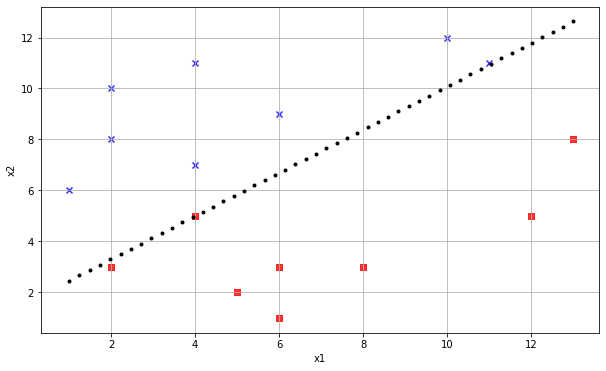

In [38]:
from matplotlib.colors import ListedColormap
def plotData(X, Y, weights):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    markers = ('s', 'x',)
    colors = ('red', 'blue',)
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    for idx, cl in enumerate(np.unique(Y)):
        plt.scatter(x=X[Y == cl, 0], y=X[Y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl) 

    for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
        slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
        intercept = -weights[0]/weights[2]
        y = (slope*i) + intercept
        plt.plot(i, y, 'k.')

plotData(X,y,weights)

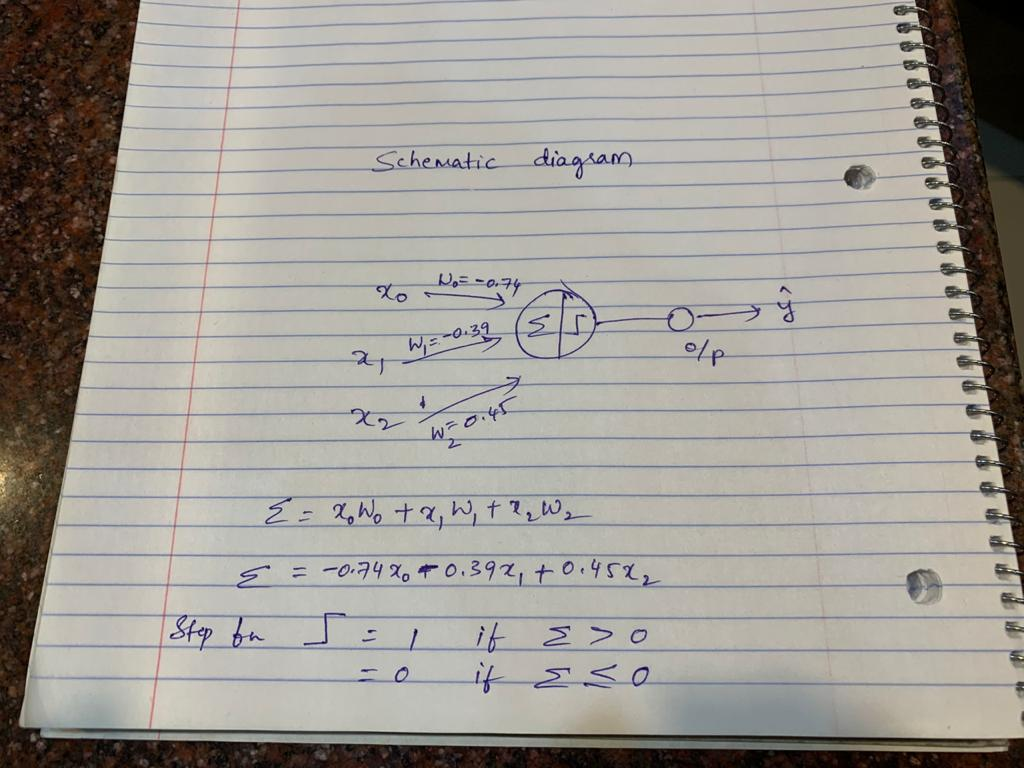

In [39]:
from IPython.display import Image
Image(filename='DeepLearning_Assignment_Q1.jpeg')